In [33]:
from sklearn.datasets import fetch_covtype
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
%matplotlib inline

In [5]:
#description: http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
fetch_data = fetch_covtype()

In [6]:
description, X, y = fetch_data['DESCR'], fetch_data['data'], fetch_data['target']

In [7]:
#setting counts
feature_count = len(X[0])

54

### Task 2.1

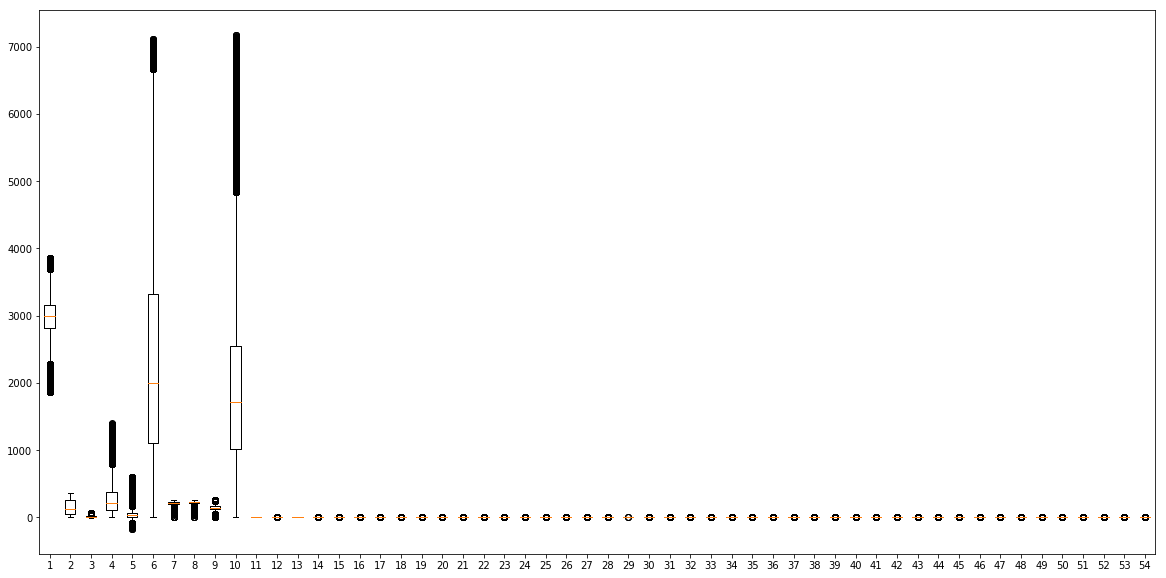

In [183]:
plt.figure(figsize=(20,10))
plt.boxplot(X)
plt.show()

### Task 2.2

In [184]:
#Splitting Data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [185]:
#Logistic Regression, SVM, nearest centroid

#Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
log_score = cross_val_score(LogisticRegression(), X_train, y_train)
print "Logistic Regression - Cross Validation Scores: "
print log_score

print "Average Logistic Regression - Cross Validation Score: "
print np.mean(log_score)

#SVM

svm = LinearSVC()
svm.fit(X_train, y_train)
svm_score = cross_val_score(LinearSVC(), X_train, y_train)

print "Linear SVM - Cross Validation Scores: "
print svm_score 

print "Average Linear SVM - Cross Validation Score: "
print np.mean(svm_score)



#Nearest Centroid:

nc = NearestCentroid()
nc.fit(X_train, y_train)
nc_score = cross_val_score(NearestCentroid(), X_train, y_train)

#print("accuracy: {:.2f}".format(nc.score(X_test, y_test)))
print "Nearest Centroid - Cross Validation Scores: "
print nc_score

print "Average Nearest - Centroid Cross Validation Score: "
print np.mean(nc_score) 


Logistic Regression - Cross Validation Score: 
[ 0.71096547  0.70889414  0.70992771]
Average Logistic Regression - Cross Validation Scores: 
0.709929105048
Linear SVM - Cross Validation Scores: 
[ 0.46291375  0.51559692  0.58767642]
Average Linear SVM - Cross Validation Score: 
0.522062365408
Nearest Centroid - Cross Validation Scores: 
[ 0.1940505   0.19360013  0.19310843]
Average Nearest - Centroid Cross Validation Score: 
0.193586356619


#### Add Standard Scaler on X_train

In [186]:
#Add Scaling

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Logistic, SVM, and nearing centroid with scaled X

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_scaled_score = cross_val_score(LogisticRegression(), X_train_scaled, y_train)

print "Logistic Regression - Cross Validation Scores: "
print lr_scaled_score
print "Average Logistic Regression - Cross Validation Score: "
print np.mean(lr_scaled_score)


#SVM

svm = LinearSVC()
svm.fit(X_train_scaled, y_train)
svm_scaled_score = cross_val_score(LinearSVC(), X_train_scaled, y_train)

print "Linear SVM - Cross Validation Scores: "
print svm_scaled_score
print "Average Linear SVM - Cross Validation Score: "
print np.mean(svm_scaled_score)


#Nearest Centroid:

nc = NearestCentroid()
nc.fit(X_train_scaled, y_train)
nc_scaled_score = cross_val_score(NearestCentroid(), X_train_scaled, y_train)
#print("accuracy: {:.2f}".format(nc.score(X_test, y_test)))

print "Nearest Centroid - Cross Validation Scores: "
print nc_scaled_score
print "Average Nearest Centroid - Cross Validation Score: "
print np.mean(nc_scaled_score)


Logistic Regression - Cross Validation Scores: 
[ 0.71475877  0.71374774  0.71637177]
Average Logistic Regression - Cross Validation Score: 
0.714959426745
Linear SVM - Cross Validation Scores: 
[ 0.71201878  0.71014712  0.71412048]
Average Linear SVM - Cross Validation Score: 
0.712095461723
Nearest Centroid - Cross Validation Scores: 
[ 0.55077931  0.55088707  0.54791738]
Average Nearest Centroid - Cross Validation Score: 
0.549861256828


The result is similar for Logistic Regression, but significantly different for Linear SVM and Nearest Centroid. For Logistic Regression scaled and without scaling, the validation score is around 0.7. However, the validation score went up from around 0.5 to 0.7 for Linear SVM with scaling, and from 0.20 to 0.55 for Nearest Centroid with scaling. 

### Task 2.3
Tune the parameters using GridSearchCV. 
Visualize result

In [215]:
#Grid Search for Logistics

param_grid = {'C':[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(X_train_scaled, y_train)

print 'Logistic Regression'
print 'Best Parameter:'
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Logistic Regression
Best Parameter:
{'C': 100.0}
Best Score:
0.715140708511


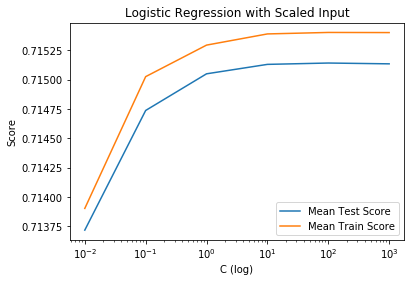

In [216]:
plt.plot([0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], grid.cv_results_['mean_test_score'], label = "Mean Test Score")
plt.plot([0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], grid.cv_results_['mean_train_score'], label = 'Mean Train Score')
plt.ylabel('Score')
plt.xlabel('C (log)')
plt.title('Logistic Regression with Scaled Input')
plt.legend()
plt.xscale('log')

In [195]:
#Grid Search for SVM

param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(LinearSVC(dual = False), param_grid)
grid.fit(X_train_scaled, y_train)

print 'Linear SVM'
print 'Best Parameter:'
print(grid.best_params_)
print 'Best Score'
print(grid.best_score_)

Linear SVM
Best Parameter:
{'C': 1.0}
Best Score
0.712724235185


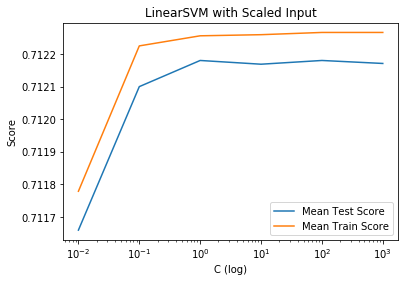

In [191]:
plt.plot([0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], grid.cv_results_['mean_test_score'], label = "Mean Test Score")
plt.plot([0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], grid.cv_results_['mean_train_score'], label = 'Mean Train Score')
plt.ylabel('Score')
plt.xlabel('C (log)')
plt.title('LinearSVM with Scaled Input')
plt.legend()
plt.xscale('log')

In [220]:
#Grid Search for Nearest Centroid

param_grid = {'shrink_threshold': np.linspace(0, 200, 41)}
grid = GridSearchCV(NearestCentroid(), param_grid)
grid.fit(X_train_scaled, y_train)


print 'Nearest Centroid'
print 'Best Parameter:'
print(grid.best_params_)
print 'Best Score'
print(grid.best_score_)

Nearest Centroid
Best Parameter:
{'shrink_threshold': 40.0}
Best Score
0.652195364869


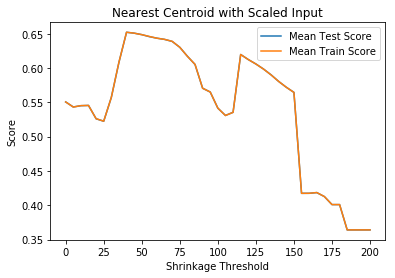

In [221]:
plt.plot(np.linspace(0, 200, 41), grid.cv_results_['mean_test_score'], label = 'Mean Test Score')
plt.plot(np.linspace(0, 200, 41), grid.cv_results_['mean_train_score'], label = 'Mean Train Score')
plt.ylabel('Score')
plt.xlabel('Shrinkage Threshold')
plt.title('Nearest Centroid with Scaled Input')
plt.legend()

With GridSearch, the results improve marginally for Linear SVM and Logistic Regression, but not enough to say whether the improvements are statistically significant. With the nearest centroid, the score went up from 0.55 to 0.65 when using a shrinkage threshold at 39.

### Task 2.4
#### CV Kfold with Shuffling

In [194]:
#stratified k-fold’ to ‘kfold’ with shufflings, with cv

kfold = KFold(shuffle = True, random_state = None)

#Without scaling

print 'KFold with Shuffling'

#Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_kfold = cross_val_score(LogisticRegression(), X_train_scaled, y_train, cv=kfold)
print 'Logistic Regression: '
print "Average Validation Scores"
print np.mean(lr_kfold)
print 'Cross Validation Scores: '
print lr_kfold


#SVM

svm = LinearSVC()
svm.fit(X_train, y_train)

svm_kfold = cross_val_score(LinearSVC(), X_train_scaled, y_train, cv=kfold)
print 'Linear SVM:'
print "Average Validation Scores"
print np.mean(svm_kfold)
print 'Cross Validation Scores:'
print svm_kfold


#Nearest Centroid:

nc = NearestCentroid()
nc.fit(X_train, y_train)

nc_kfold = cross_val_score(NearestCentroid(), X_train_scaled, y_train, cv=kfold)
#print("accuracy: {:.2f}".format(nc.score(X_train_scaled, y_train)))
print 'Nearest Centroid:'
print "Average Validation Scores"
print np.mean(nc_kfold)
print 'Cross Validation Scores:'
print nc_kfold

KFold with Shuffling
Logistic Regression: 
Average Validation Scores
0.715009902262
Cross Validation Scores: 
[ 0.71578556  0.71285963  0.71638452]
Linear SVM:
Average Validation Scores
0.712157408109
Cross Validation Scores:
[ 0.7136307   0.70914886  0.71369266]
Nearest Centroid:
Average Validation Scores
0.549783251752
Cross Validation Scores:
[ 0.55108672  0.55045335  0.54780968]


#### GridSearch with KFold + Shuffling

In [196]:
#Grid Search for Logistics and KFold

param_grid = {'C':[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)

print 'Logistic Regression: '
print "Best Parameter"
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Logistic Regression: 
Average Validation Scores
{'C': 1000.0}
Cross Validation Scores:
0.714996133184


In [197]:
#Grid Search for LinearSV

param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(LinearSVC(dual = False), param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)

print 'Linear SVM: '
print "Best Parameter"
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Linear SVM: 
Average Validation Scores
{'C': 1000.0}
Cross Validation Scores:
0.712586544397


In [222]:
#Grid Search for Nearest Centroid

param_grid = {'shrink_threshold': np.linspace(0, 200, 41)}
grid = GridSearchCV(NearestCentroid(), param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)

print 'Nearest Centroid: '
print "Best Parameter"
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Nearest Centroid: 
Best Parameter
{'shrink_threshold': 40.0}
Best Score:
0.652367478354


#### Grid Search and Change Random Seed of Shuffling

In [199]:
#change random seed of shuffling

kfold = KFold(shuffle = True, random_state = 10)

In [200]:
param_grid = {'C':[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)

print 'Logistic Regression: '
print "Best Parameter"
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Logistic Regression: 
Average Validation Scores
{'C': 1000.0}
Cross Validation Scores:
0.714986953798


In [201]:
#Grid Search for LinearSV

param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(LinearSVC(dual = False), param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)

print 'Linear SVM: '
print "Best Parameter"
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Linear SVM: 
Average Validation Scores
{'C': 10.0}
Cross Validation Scores:
0.712526878389


In [223]:
#Grid Search for Nearest Centroid

param_grid = {'shrink_threshold': np.linspace(0, 200, 41)}
grid = GridSearchCV(NearestCentroid(), param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)

print 'Nearest Centroid: '
print "Best Parameter"
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Nearest Centroid: 
Best Parameter
{'shrink_threshold': 40.0}
Best Score:
0.652271094802


#### Grid Search + Changing Split of Data

In [203]:
#Changing the split of data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
kfold = KFold(shuffle = True, random_state = None)

#Add Scaling

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [204]:
param_grid = {'C':[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)

print 'Logistic Regression: '
print "Best Parameter:"
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Logistic Regression: 
Average Validation Scores
{'C': 1000.0}
Cross Validation Scores:
0.715230207523


In [205]:
#Grid Search for LinearSV

param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(LinearSVC(dual = False), param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)

print 'Linear SVM: '
print "Best Parameter:"
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Linear SVM: 
Average Validation Scores
{'C': 100.0}
Cross Validation Scores:
0.712577365011


In [224]:
#Grid Search for Nearest Centroid

param_grid = {'shrink_threshold': np.linspace(0, 200, 41)}
grid = GridSearchCV(NearestCentroid(), param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)

print 'Nearest Centroid: '
print "Best Parameter"
print(grid.best_params_)
print 'Best Score:'
print(grid.best_score_)

Nearest Centroid: 
Best Parameter
{'shrink_threshold': 40.0}
Best Score:
0.652209133948


From changing from stratified k-fold to k-fold and shuffling:
-	Logistic Regression:  the parameter changed to (C=1000), and the score had gone down marginally. This change is not significant.
-	 Linear SVM: the score actually went down 0.002 points, and the best C parameter is now at 1000. 
-	Nearest Centroid: The best shrink threshold is still at 40, with the best score at around 0.652. It doesn't change much. 

From changing the random seed state from 0 to 10:
-	 Logistic Regression: The parameter stayed at (C=1000), and the score had gone down marginally. This change is not significant. 
-	Linear SVM: the score went down 0.00005 points and the best parameter changed from 1000 to 10. However, this changed due to the effect of randomness, and that the score output from C = 10 to 1000 did not affect the data as much. 
-	Nearest Centroid: The best shrink threshold is still at 40, with the best score at around 0.652. It doesn't change much. 

Finally, from changing the split of the data, I have turned off the kfold random seed, and changed on train_test_split random state to 10. 
-	Logistic Regression: C stayed at 1000, and the score barely changed. This change is not significant.  
-	Linear SVM: C has changed to 100, but score barely changed. 
-	Nearest Centroid: The best shrink threshold is still at 40, with the best score at around 0.652. It doesn't change much. 

### Task 2.5

In [207]:
logreg = LogisticRegression(multi_class = "multinomial", solver = 'lbfgs').fit(X_train_scaled, y_train)
#logreg.coef_

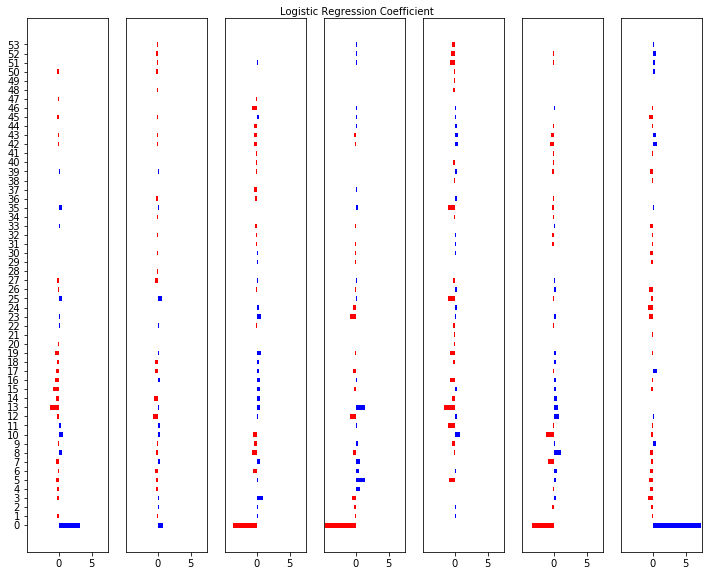

In [212]:
fig, axes = plt.subplots(1, 7, figsize=(10, 8))
for ax, coef in zip(axes, logreg.coef_):
    ax.barh(range(54), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(logreg.coef_.min() - .1, logreg.coef_.max() + .1)

#    ax.set_frame_on(False)
    ax.set_yticks(())
    
axes[0].set_yticks(range(54))
plt.tight_layout()
fig.text(0.5, 0.98, 'Logistic Regression Coefficient', ha ='center')
plt.show()

In [209]:
lsvm = LinearSVC().fit(X_train_scaled, y_train)
#lsvm.coef_

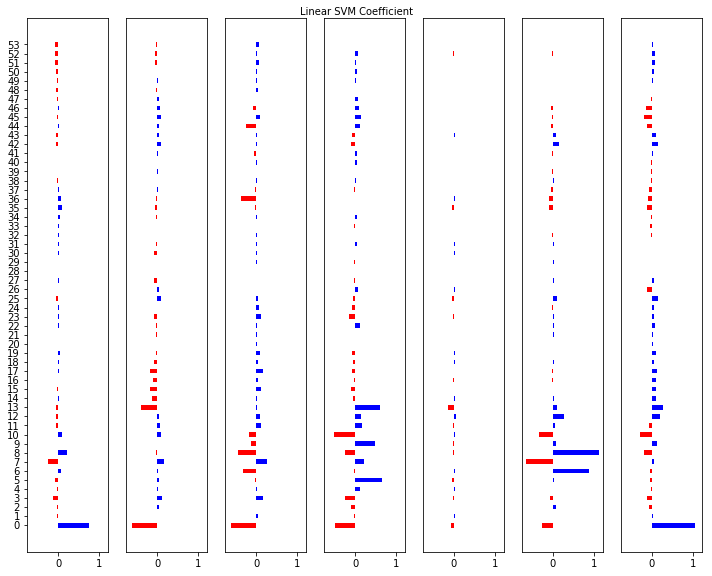

In [211]:
fig, axes = plt.subplots(1, 7, figsize=(10, 8))
for ax, coef in zip(axes, lsvm.coef_):
    ax.barh(range(54), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(lsvm.coef_.min() - .1, lsvm.coef_.max() + .1)

    #ax.set_frame_on(False)
    ax.set_yticks(())
    
axes[0].set_yticks(range(54))
plt.tight_layout()
fig.text(0.5, 0.98, 'Linear SVM Coefficient', ha ='center')
plt.show()